In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import daslib


In [2]:
#vamos a cargar la señal Fp

root_folder = "Z:/DAS/2021-11-30_Medidas"
dfn = "medida_211130_11_55_19.mat"
vfn = "medida_211130_11_55_19.mp4"

#combine path
dpath = os.path.join(root_folder, dfn)
vpath = os.path.join(root_folder, vfn)
#read mat file
das_np = daslib.load_das_mat(dpath)
print(das_np.shape)

(16000, 1160)


In [3]:
s = das_np.T
print(s.shape)


(1160, 16000)


In [4]:

#vamos a seleccionar un tramito de la señal de 700 a 1000
ss = s[700:1100,:]
print(s.shape)


(1160, 16000)


In [5]:
#parte de filtrado de la señal
#vamos a remuestrear a 10hz
temp = ss.reshape(ss.shape[0], int(ss.shape[1]/20), 20)
tempm = temp.mean(axis=2)
ss = tempm.T


In [6]:
#
nl = 8 #tamaño de la ventana de longitud
nt = 50 #tamaño de la ventana de tiempo
lt = ss.shape[1] #longitud de la señal
ll = ss.shape[0]

ol = 6 #overlap en longitud
ot = 20 #overlap en tiempo

print(ll)


800


In [7]:
#separamos las señales en ventanas de longitud nl
sg = ss.reshape(-1,nl,lt)
print(sg.shape)



(100, 8, 400)


In [8]:
#creamos una lista de cuadrados con las señales con overlap
sgl = []
for i in range(0,sg.shape[0]-ol,ol):
    sgl.append(sg[i:i+ol,:,:])
sgl = np.array(sgl)
print(sgl.shape)


(16, 6, 8, 400)


In [9]:
#
# Creamos una lista de cuadrados
grid = []
for i in range(ll//nl):
    for j in range(lt//nt):
        square = ss[i*nl:(i+1)*nl, j*nt:(j+1)*nt]
        grid.append(square)

#imprimimos el numero de cuadrados
print(len(grid))

800


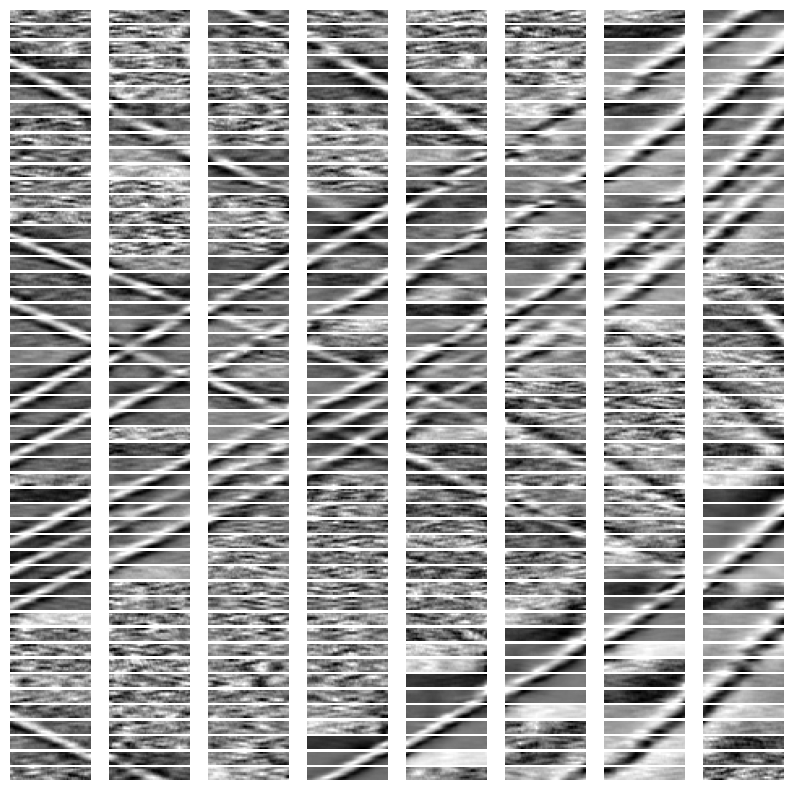

In [10]:
#plot each grid element as image
fig, axes = plt.subplots(50, 8, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(grid[i], cmap='gray')
    ax.set_axis_off()
plt.show()



In [11]:
len(grid)
grid[0].shape

(8, 50)

In [12]:
#guardamos la lista de cuadrados
np.save('grid.npy', grid)
